In [1]:
from dotenv import load_dotenv
from sentence_transformers import SentenceTransformer
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from math import sqrt
import numpy as np

load_dotenv()

True

In [2]:
all_mini_lm = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
multilingual_e5_large = SentenceTransformer('intfloat/multilingual-e5-large')

## Example Embeddings

In [3]:
sentences = [
    "Ich danke dir für die Glückwünsche",
    "Danke für Alles",
    "Vielen Dank",
    "Das wäre doch nicht nötig gewesen, Danke",
    "Das Haus soll rot gestrichen Werden",
    "Die Kabel müssen noch im Haus verlegt werden",
    "Das Gerüst muss noch aufgebaut werden",
    "Im Keller ist ein Wasserschaden"
]

labels = ["Danke", "Haus"]

all_mini_lm_embeddings = all_mini_lm.encode(sentences)
multilingual_embeddings = multilingual_e5_large.encode(sentences)

In [4]:
tsne_3d = TSNE(n_components=3, perplexity=3, random_state=42)
tsne_2d = TSNE(n_components=2, perplexity=3, random_state=42)

all_mini_np_embeddings = np.array(all_mini_lm_embeddings)

all_mini_embedings_3d = tsne_3d.fit_transform(all_mini_np_embeddings)
all_mini_embedings_2d = tsne_2d.fit_transform(all_mini_np_embeddings)

In [5]:
def generate_2d_embeddings(embeddings):
    
    mini_lm_x_2d = []
    mini_lm_y_2d = []

    for embedding in embeddings:
        mini_lm_x_2d.append(embedding[0])
        mini_lm_y_2d.append(embedding[1])

    return mini_lm_x_2d,mini_lm_y_2d

x_2d, y_2d = generate_2d_embeddings(all_mini_embedings_2d)


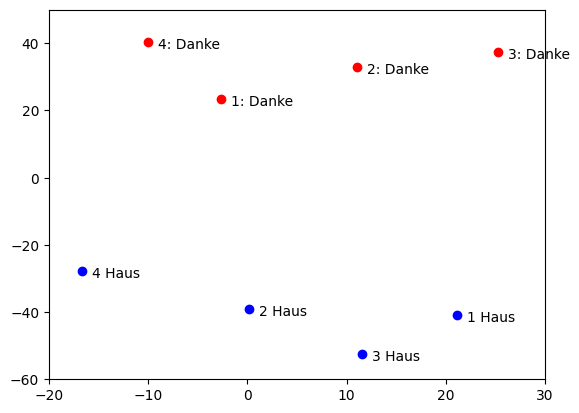

In [20]:
plt.scatter(x_2d[0:4], y_2d[0:4], color="red")
plt.scatter(x_2d[4:8], y_2d[4:8], color="blue")

for j in range(int(len(sentences) / len(labels))):
    plt.text(x_2d[j] + 1 , y_2d[j] - 2, f'{j + 1}: {labels[0]}')
    plt.text(x_2d[j + 4] + 1, y_2d[j + 4] - 2, f'{j + 1} {labels[1]}')

plt.xlim(-20, 30)
plt.ylim(-60, 50)
plt.show()

## Calculate Cosine-Similarities for all Sentences

In [12]:
def cosine_sim(vector_a, vector_b):
    assert len(vector_a) == len(vector_b)
    return dot_product(vector_a, vector_b) / (euclidean_norm(vector_a) * euclidean_norm(vector_b))
    
def euclidean_norm(vector):
    return sqrt(sum([val * val for val in vector]))

def dot_product(vector_a, vector_b):
    assert len(vector_a) == len(vector_b)
    return sum([vector_a[i] * vector_b[i] for i in range(len(vector_a))])

In [13]:
vector_1 = [-1,-2,-3]
vector_2 = [2,4,6]

cosine_sim(vector_a=vector_1, vector_b=vector_2)

-1.0

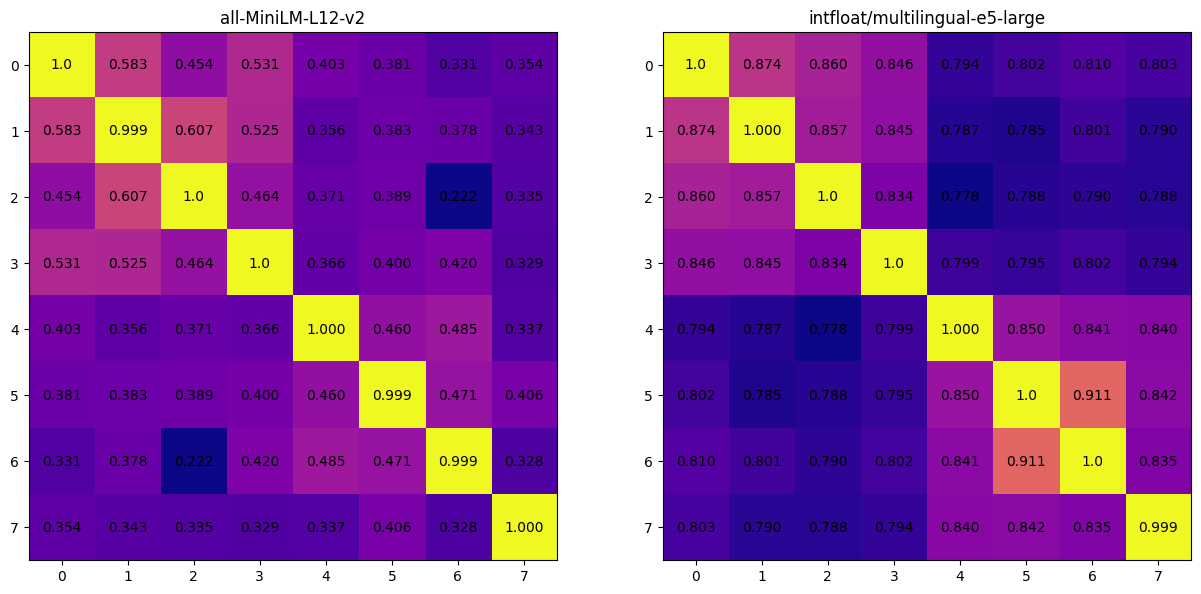

In [36]:
def get_cosine_matrix(embeddings):
    cosine_matrix = []
    for i in embeddings:
        cosine_sub_matrix = []
        for j in embeddings:
            cosine_sub_matrix.append(cosine_sim(i, j))
        cosine_matrix.append(cosine_sub_matrix)
    return cosine_matrix


import matplotlib.pyplot as plt
import numpy as np

# Convert the 2D list to a numpy array
matrix_1 = np.array(get_cosine_matrix(all_mini_lm_embeddings))
matrix_2 = np.array(get_cosine_matrix(multilingual_embeddings))


# Create a figure with 1 row and 2 columns of subplots
fig, axs = plt.subplots(1, 2, figsize=(15, 7.5))

# Display the first matrix in the first subplot
axs[0].imshow(matrix_1, cmap='plasma', interpolation='nearest')
axs[0].set_title('all-MiniLM-L12-v2')

# Display the second matrix in the second subplot
axs[1].imshow(matrix_2, cmap='plasma', interpolation='nearest')
axs[1].set_title('intfloat/multilingual-e5-large')


def set_text(ax, matrix):
    # Add text annotations for each cell
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            ax.text(j, i, str(matrix[i, j])[:5], va='center', ha='center', color='black', fontsize=10)

set_text(axs[0], matrix_1)
set_text(axs[1], matrix_2)

# Show the plot
plt.show()